In [18]:
import pandas as pd
import numpy as np

In [19]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/Data Sets'
base_dir = '/content/drive/MyDrive/Data Sets/chest_xray (1)'


In [20]:
train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

validation_dir = os.path.join(base_dir, 'val')


In [21]:
# Creating the model architecture
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
# Model compilation
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [23]:
# Rescaling
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
 validation_dir, target_size=(150, 150),
 batch_size=2,
 class_mode='binary')

Found 5236 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200, # Increased from 100
    epochs=7,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-25-c2d65b67b52c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/7
200/200 [==============================] - ETA: 0s - loss: 0.4107 - acc: 0.8241

200/200 [==============================] - 87s 422ms/step - loss: 0.4107 - acc: 0.8241 - val_loss: 0.4065 - val_acc: 0.7500
Epoch 2/7
200/200 [==============================] - 51s 256ms/step - loss: 0.1722 - acc: 0.9362
Epoch 3/7
200/200 [==============================] - 46s 230ms/step - loss: 0.1306 - acc: 0.9515
Epoch 4/7
200/200 [==============================] - 45s 223ms/step - loss: 0.1026 - acc: 0.9620
Epoch 5/7
200/200 [==============================] - 44s 218ms/step - loss: 0.0849 - acc: 0.9710
Epoch 6/7
200/200 [==============================] - 44s 217ms/step - loss: 0.0714 - acc: 0.9737
Epoch 7/7
200/200 [==============================] - 49s 243ms/step - loss: 0.0547 - acc: 0.9812


In [26]:
# Test data prediction
y_pred = model.predict(test_generator)

32/32 [==============================] - 376s 12s/step


In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
# Confusion matrix and classificatino report
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
cf = confusion_matrix(test_generator.classes, y_pred)

<Axes: >

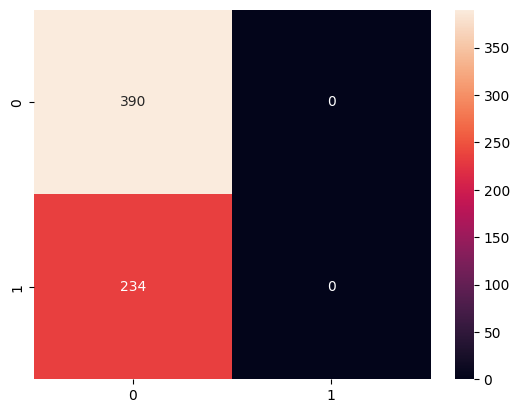

In [30]:
import seaborn as sns
sns.heatmap(cf, fmt ='g', annot= True)

In [31]:
CR = classification_report(test_generator.classes, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(CR)

In [32]:
 model.save('chest_xray_prediction.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
